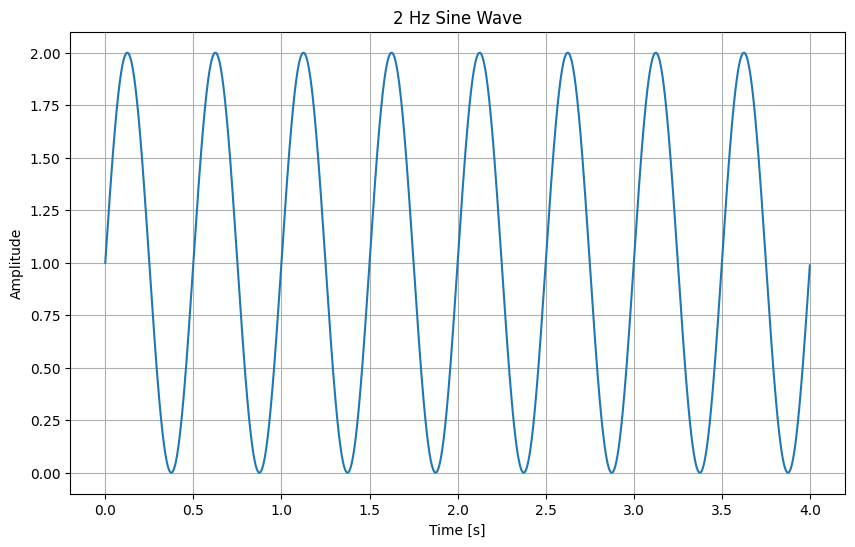

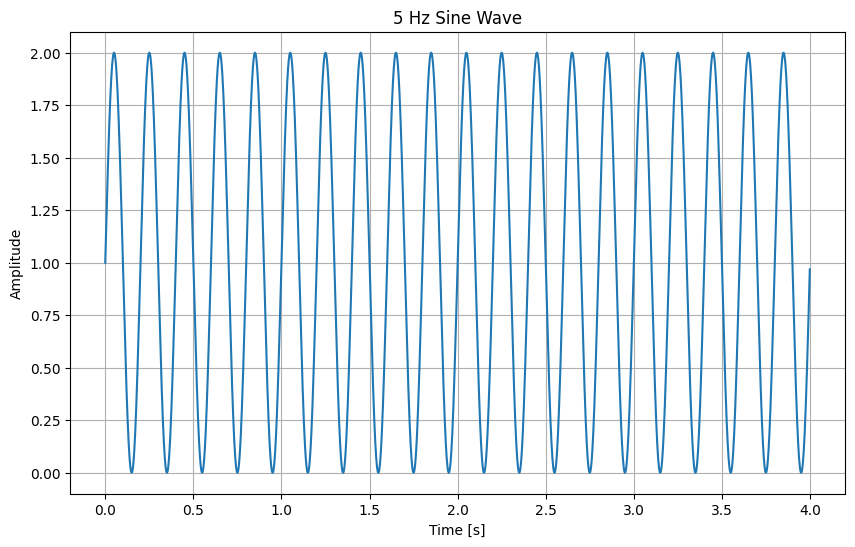

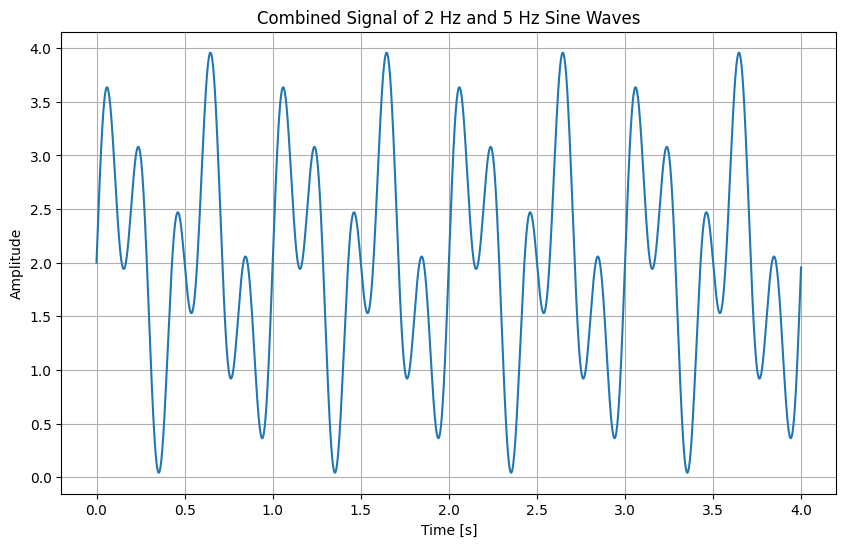

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
sampling_rate = 1000  # Sampling rate in Hz
duration = 4  # Duration in seconds
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)  # Time vector

# Generate sine waves
freq1 = 2  # Frequency of the first sine wave in Hz
freq2 = 5  # Frequency of the second sine wave in Hz
sine_wave1 = 1 + np.sin(2 * np.pi * freq1 * t)
sine_wave2 = 1 + np.sin(2 * np.pi * freq2 * t)

# Combine sine waves
combined_signal = sine_wave1 + sine_wave2

# Plot the first sine wave
plt.figure(figsize=(10, 6))
plt.plot(t, sine_wave1)
plt.title('2 Hz Sine Wave')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plot the second sine wave
plt.figure(figsize=(10, 6))
plt.plot(t, sine_wave2)
plt.title('5 Hz Sine Wave')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plot the combined signal
plt.figure(figsize=(10, 6))
plt.plot(t, combined_signal)
plt.title('Combined Signal of 2 Hz and 5 Hz Sine Waves')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()




#

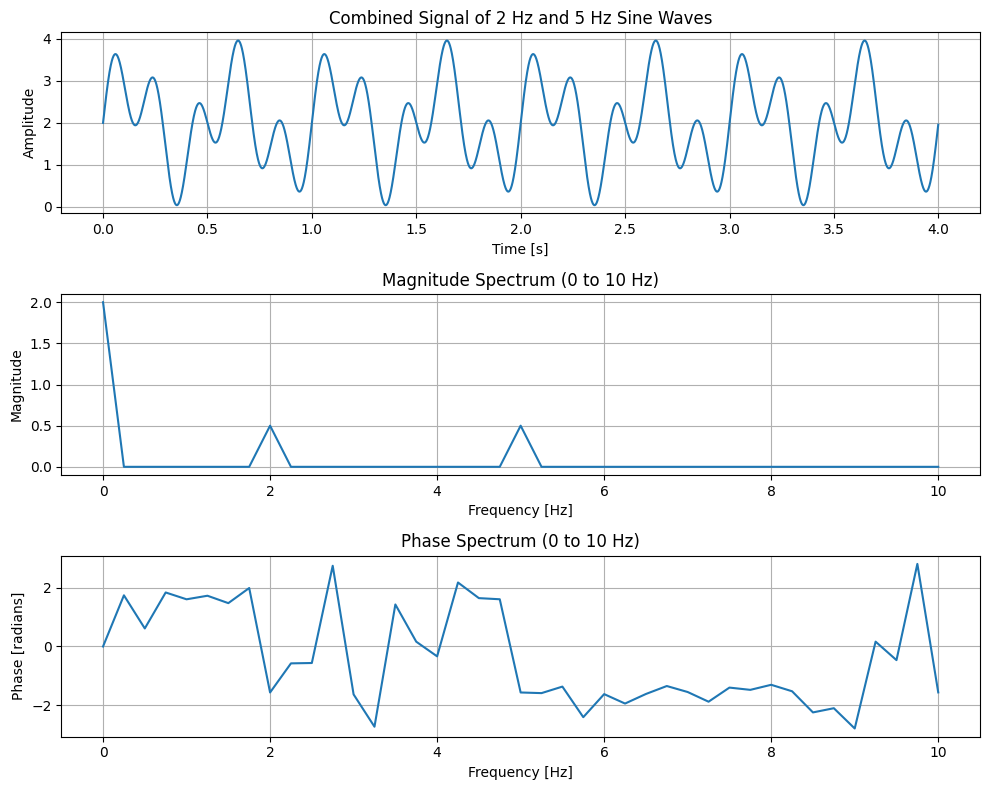

In [48]:
# Apply Discrete Fourier Transform (DFT)
dft = np.fft.fft(combined_signal)
frequencies = np.fft.fftfreq(len(dft), 1/sampling_rate)

# Normalize the DFT output
dft_normalized = dft / len(dft)

# Filter the frequencies to show only 0 to 10 Hz
mask = (frequencies >= 0) & (frequencies <= 10)
filtered_frequencies = frequencies[mask]
filtered_dft = dft_normalized[mask]

# Compute magnitude and phase
filtered_magnitude = np.abs(filtered_dft)
filtered_phase = np.angle(filtered_dft)


# Plot the magnitude spectrum
# plt.subplot(2, 1, 2)
# plt.plot(frequencies[:len(frequencies)//2], np.abs(dft)[:len(dft)//2])
# plt.title('Magnitude Spectrum')
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('Magnitude')
# plt.grid(True)

# Plot the combined signal
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.plot(t, combined_signal)
plt.title('Combined Signal of 2 Hz and 5 Hz Sine Waves')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the magnitude spectrum for 0 to 10 Hz
plt.subplot(3, 1, 2)
plt.plot(filtered_frequencies, filtered_magnitude)
plt.title('Magnitude Spectrum (0 to 10 Hz)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)

# Plot the phase spectrum for 0 to 10 Hz
plt.subplot(3, 1, 3)
plt.plot(filtered_frequencies, filtered_phase)
plt.title('Phase Spectrum (0 to 10 Hz)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [radians]')
plt.grid(True)

plt.tight_layout()
plt.show()

Text(0.5, 0, 'Time [s]')

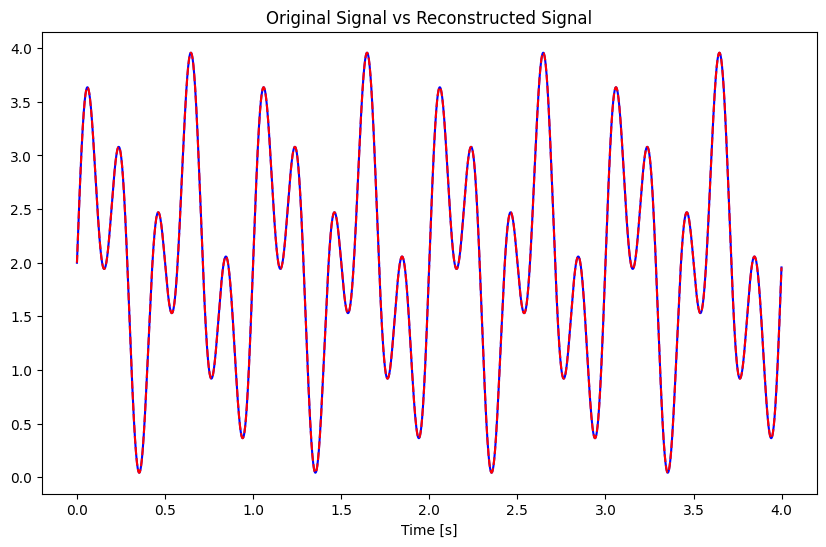

In [50]:
# inverse fourier transform
# Inverse Discrete Fourier Transform (IDFT)

# Apply Inverse Discrete Fourier Transform (IDFT)
idft = np.fft.ifft(dft)
idft = np.real(idft)

# Plot the original signal and the reconstructed signal
plt.figure(figsize=(10, 6))
plt.plot(t, combined_signal, label='Original Signal', color='blue')
plt.plot(t, idft, label='Reconstructed Signal', linestyle='dashed', color='red')
plt.title('Original Signal vs Reconstructed Signal')
plt.xlabel('Time [s]')